In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the random module.
import random 
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c46a9f1a17d6c95a3825735e927c1cf


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 2 of Set 1 | yar-sale
City not found. Skipping...
Processing Record 3 of Set 1 | mujiayingzi
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
City not found. Skipping...
Processing Record 5 of Set 1 | santa cruz
City not found. Skipping...
Processing Record 6 of Set 1 | sabha
City not found. Skipping...
Processing Record 7 of Set 1 | luoyang
City not found. Skipping...
Processing Record 8 of Set 1 | benghazi
City not found. Skipping...
Processing Record 9 of Set 1 | escanaba
City not found. Skipping...
Processing Record 10 of Set 1 | tuktoyaktuk
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 12 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 13 of Set 1 | la ronge
City not found. Skipping...
Processing Record 14 of Set 1 | belushya

City not found. Skipping...
Processing Record 20 of Set 3 | lodja
City not found. Skipping...
Processing Record 21 of Set 3 | berbera
City not found. Skipping...
Processing Record 22 of Set 3 | vao
City not found. Skipping...
Processing Record 23 of Set 3 | maragogi
City not found. Skipping...
Processing Record 24 of Set 3 | tungkang
City not found. Skipping...
Processing Record 25 of Set 3 | taua
City not found. Skipping...
Processing Record 26 of Set 3 | mareeba
City not found. Skipping...
Processing Record 27 of Set 3 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 3 | maldonado
City not found. Skipping...
Processing Record 29 of Set 3 | lebu
City not found. Skipping...
Processing Record 30 of Set 3 | sao filipe
City not found. Skipping...
Processing Record 31 of Set 3 | luan
City not found. Skipping...
Processing Record 32 of Set 3 | grand gaube
City not found. Skipping...
Processing Record 33 of Set 3 | anadyr
City not found. Skipping...
Processing Record 34 of 

City not found. Skipping...
Processing Record 39 of Set 5 | ginda
City not found. Skipping...
Processing Record 40 of Set 5 | diu
City not found. Skipping...
Processing Record 41 of Set 5 | eyl
City not found. Skipping...
Processing Record 42 of Set 5 | cap malheureux
City not found. Skipping...
Processing Record 43 of Set 5 | ketchikan
City not found. Skipping...
Processing Record 44 of Set 5 | gurskoye
City not found. Skipping...
Processing Record 45 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 5 | itoman
City not found. Skipping...
Processing Record 47 of Set 5 | henties bay
City not found. Skipping...
Processing Record 48 of Set 5 | vermillion
City not found. Skipping...
Processing Record 49 of Set 5 | sitio novo do tocantins
City not found. Skipping...
Processing Record 50 of Set 5 | leningradskiy
City not found. Skipping...
Processing Record 1 of Set 6 | lagoa
City not found. Skipping...
Processing Record 2 of Set 6 | copperas cove
Cit

City not found. Skipping...
Processing Record 8 of Set 8 | brae
City not found. Skipping...
Processing Record 9 of Set 8 | vryheid
City not found. Skipping...
Processing Record 10 of Set 8 | eureka
City not found. Skipping...
Processing Record 11 of Set 8 | guayaramerin
City not found. Skipping...
Processing Record 12 of Set 8 | mitchell
City not found. Skipping...
Processing Record 13 of Set 8 | sabang
City not found. Skipping...
Processing Record 14 of Set 8 | hamilton
City not found. Skipping...
Processing Record 15 of Set 8 | gumdag
City not found. Skipping...
Processing Record 16 of Set 8 | grand centre
City not found. Skipping...
Processing Record 17 of Set 8 | axim
City not found. Skipping...
Processing Record 18 of Set 8 | sambava
City not found. Skipping...
Processing Record 19 of Set 8 | beringovskiy
City not found. Skipping...
Processing Record 20 of Set 8 | muros
City not found. Skipping...
Processing Record 21 of Set 8 | luderitz
City not found. Skipping...
Processing Reco

City not found. Skipping...
Processing Record 26 of Set 10 | sterling
City not found. Skipping...
Processing Record 27 of Set 10 | dandong
City not found. Skipping...
Processing Record 28 of Set 10 | aksu
City not found. Skipping...
Processing Record 29 of Set 10 | asau
City not found. Skipping...
Processing Record 30 of Set 10 | moiyabana
City not found. Skipping...
Processing Record 31 of Set 10 | zaterechnyy
City not found. Skipping...
Processing Record 32 of Set 10 | riyaq
City not found. Skipping...
Processing Record 33 of Set 10 | arkhangelsk
City not found. Skipping...
Processing Record 34 of Set 10 | george
City not found. Skipping...
Processing Record 35 of Set 10 | isangel
City not found. Skipping...
Processing Record 36 of Set 10 | plettenberg bay
City not found. Skipping...
Processing Record 37 of Set 10 | norman wells
Processing Record 38 of Set 10 | marcona
City not found. Skipping...
Processing Record 39 of Set 10 | lac du bonnet
Processing Record 40 of Set 10 | rudbar
P

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.28,-126.83,64.40,72,75,0.38,CA,2020-08-12 23:47:02
1,Lac Du Bonnet,50.25,-96.06,87.01,72,48,5.99,CA,2020-08-12 23:47:02
2,Rudbar,30.15,62.60,75.81,21,0,8.55,AF,2020-08-12 23:47:02
3,Raditsa-Krylovka,53.32,34.36,49.14,96,2,6.78,RU,2020-08-12 23:47:03
4,Rio Branco,-9.97,-67.81,86.00,55,29,2.24,BR,2020-08-12 23:47:03
...,...,...,...,...,...,...,...,...,...
136,Wasilla,61.58,-149.44,62.01,72,75,3.56,US,2020-08-12 23:47:34
137,Keti Bandar,24.14,67.45,84.83,81,98,23.31,PK,2020-08-12 23:47:34
138,Paracatu,-17.22,-46.87,68.70,54,12,3.76,BR,2020-08-12 23:43:57
139,Bilibino,68.05,166.44,52.36,82,100,3.33,RU,2020-08-12 23:47:34


In [11]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2020-08-12 23:47:02,65.28,-126.83,64.40,72,75,0.38
1,Lac Du Bonnet,CA,2020-08-12 23:47:02,50.25,-96.06,87.01,72,48,5.99
2,Rudbar,AF,2020-08-12 23:47:02,30.15,62.60,75.81,21,0,8.55
3,Raditsa-Krylovka,RU,2020-08-12 23:47:03,53.32,34.36,49.14,96,2,6.78
4,Rio Branco,BR,2020-08-12 23:47:03,-9.97,-67.81,86.00,55,29,2.24
5,Vilhena,BR,2020-08-12 23:47:03,-12.74,-60.15,78.80,50,20,5.82
6,Tanout,NE,2020-08-12 23:47:04,14.97,8.89,84.02,53,49,7.25
7,Camana,PE,2020-08-12 23:47:04,-16.62,-72.71,58.80,73,12,6.82
8,Kalaleh,IR,2020-08-12 23:47:04,37.38,55.49,75.20,73,26,4.70
9,Ramhormoz,IR,2020-08-12 23:47:04,31.28,49.60,86.43,18,0,4.21


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

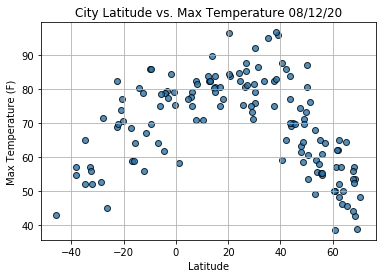

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

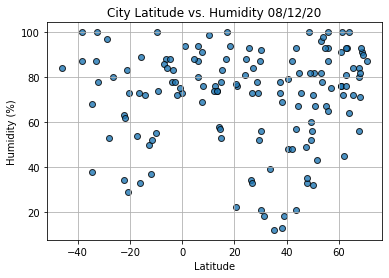

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

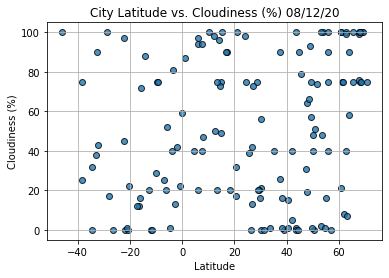

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

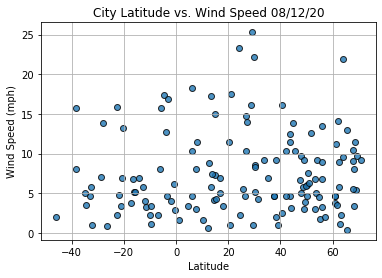

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2020-08-12 23:47:02,65.28,-126.83,64.40,72,75,0.38
1,Lac Du Bonnet,CA,2020-08-12 23:47:02,50.25,-96.06,87.01,72,48,5.99
2,Rudbar,AF,2020-08-12 23:47:02,30.15,62.60,75.81,21,0,8.55
3,Raditsa-Krylovka,RU,2020-08-12 23:47:03,53.32,34.36,49.14,96,2,6.78
6,Tanout,NE,2020-08-12 23:47:04,14.97,8.89,84.02,53,49,7.25
...,...,...,...,...,...,...,...,...,...
135,Chilliwack,CA,2020-08-12 23:45:49,49.17,-121.94,69.80,52,75,9.17
136,Wasilla,US,2020-08-12 23:47:34,61.58,-149.44,62.01,72,75,3.56
137,Keti Bandar,PK,2020-08-12 23:47:34,24.14,67.45,84.83,81,98,23.31
139,Bilibino,RU,2020-08-12 23:47:34,68.05,166.44,52.36,82,100,3.33


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

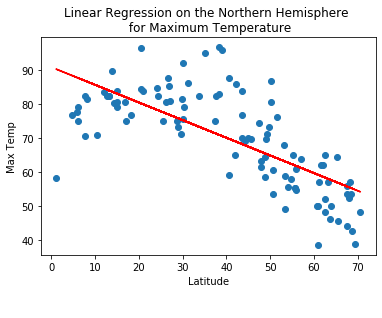

In [21]:
  # Linear regression on the Northern Hemisphere
  x_values = northern_hemi_df["Lat"]
  y_values = northern_hemi_df["Max Temp"]
  # Call the function.
  plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,20))
                      

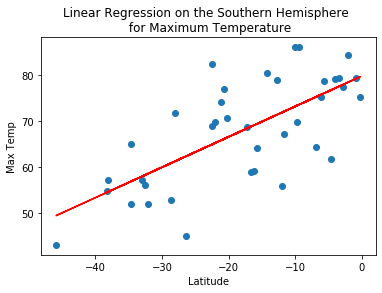

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,40))

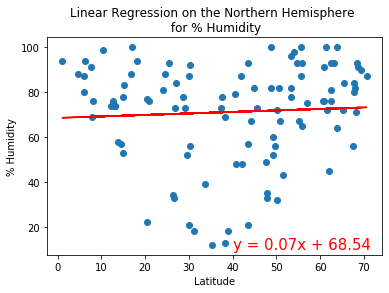

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

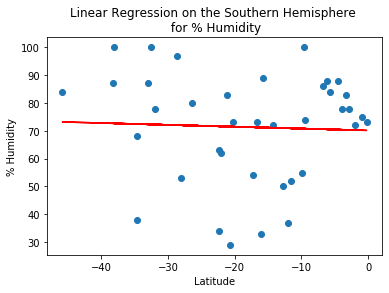

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,40))

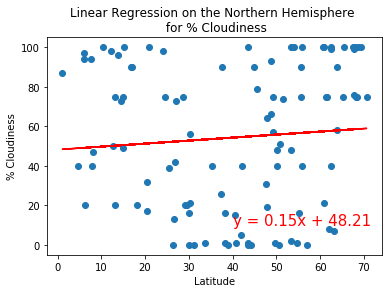

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

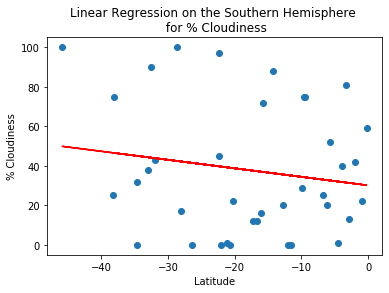

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

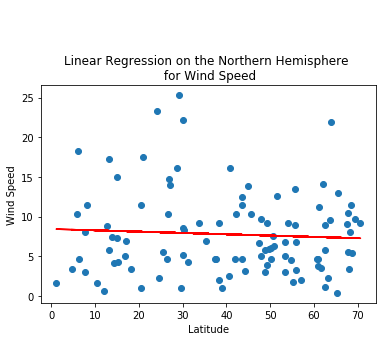

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

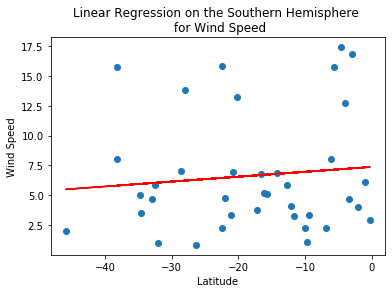

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,0))

In [29]:
# Google API Key
g_key = "your Google API key goes here"
